## Initial Exploration

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
cannabis_data = pd.read_csv('cannabis.csv')
cannabis_type = pd.DataFrame(cannabis_data)

In [66]:
cannabis_type.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [7]:
test = cannabis_type.groupby('Rating').count()
test.stack().to_frame().head()

0
Rating                
0.0    Strain       71
       Type         71
       Effects      71
       Flavor       66
       Description  71

In [8]:
cannabis_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [9]:
split_effects = cannabis_type['Effects'].str.split(',', expand=True)
split_effects.head()

,0,1,2,3,4
0,Creative,Energetic,Tingly,Euphoric,Relaxed
1,Relaxed,Aroused,Creative,Happy,Energetic
2,Uplifted,Happy,Relaxed,Energetic,Creative
3,Tingly,Creative,Hungry,Relaxed,Uplifted
4,Happy,Relaxed,Euphoric,Uplifted,Talkative


In [10]:
split_flavor = cannabis_type['Flavor'].str.split(',', expand=True)
split_flavor.head()


,0,1,2,3
0,Earthy,Sweet,Citrus,None
1,Flowery,Violet,Diesel,None
2,Spicy/Herbal,Sage,Woody,None
3,Apricot,Citrus,Grapefruit,None
4,Citrus,Earthy,Orange,None


In [11]:
frames1= [split_effects.astype(str),split_flavor.astype(str)]

In [12]:
effects_flavor = pd.concat(frames1,axis=1, sort=False)
effects_flavor.head()

,0,1,2,3,4,0,1,2,3
0,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [13]:
effects_flavor = pd.concat(frames1,axis=1, sort=False)
effects_flavor.columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3','Flavor_4']
effects_flavor.head()

,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [14]:
frames = [cannabis_type, effects_flavor]

In [15]:
new_cannabis = pd.concat(frames,axis=1, sort=False).drop(columns = ['Effects','Flavor'])
new_cannabis.head()

,Strain,Type,Rating,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,100-Og,hybrid,4.0,$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [16]:
new_cannabis.describe(include='all')

,Strain,Type,Rating,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
count,2351,2351,2351.000000,2318,2351,2351,2351,2351,2351,2351,2351,2351,2351
unique,2350,3,NaN,2312,15,15,14,14,14,49,49,50,18
top,B-Witched,hybrid,NaN,None,Relaxed,Happy,Euphoric,Euphoric,Uplifted,Earthy,Sweet,Sweet,None
freq,2,1212,NaN,4,825,571,413,386,273,531,364,272,2262
mean,NaN,NaN,4.310634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.836394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
new_cannabis = pd.concat(frames,axis=1, sort=False).drop(columns = ['Effects','Flavor','Flavor_4'])
new_cannabis.head()

,Strain,Type,Rating,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,100-Og,hybrid,4.0,$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus
1,98-White-Widow,hybrid,4.7,The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
2,1024,sativa,4.4,1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
3,13-Dawgs,hybrid,4.2,13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
4,24K-Gold,hybrid,4.6,"Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange


In [18]:
new_cannabis.to_csv('clean_cannabis.csv')

In [19]:
effect1 = new_cannabis.loc[new_cannabis['Effect_1'] == 'Relaxed']
#effect1.head()
#print(new_cannabis['Effect_1'].value_counts())
#print('-'*50)
#print(effect1['Type'].value_counts())
#print('-'*50)
#print(effect1['Rating'].value_counts())

In [20]:
effect2 = new_cannabis.loc[new_cannabis['Effect_2'] == 'Happy']
#effect2
#print(new_cannabis['Effect_2'].value_counts())
#print('-'*50)
#print(effect2['Type'].value_counts())
#print('-'*50)
#print(effect2['Rating'].value_counts())
sample = [new_cannabis['Effect_2'], new_cannabis['Type']]
test = pd.concat(sample,axis=1, sort=False)
test1 = test.loc[test['Effect_2']== 'Relaxed']
test1['Type'].value_counts()

hybrid    219
indica     92
sativa     40
Name: Type, dtype: int64

In [21]:
effect3 = new_cannabis.loc[new_cannabis['Effect_3'] == 'Euphoric']
#effect3.head()
#print(new_cannabis['Effect_3'].value_counts())
#print('-'*50)
#print(effect3['Type'].value_counts())
#print('-'*50)
#print(effect3['Rating'].value_counts())

In [22]:
effect4 = new_cannabis.loc[new_cannabis['Effect_4'] == 'Euphoric']
#effect4.head()
#print(new_cannabis['Effect_4'].value_counts())
#print('-'*50)
#print(effect4['Type'].value_counts())

In [23]:
effect5 = new_cannabis.loc[new_cannabis['Effect_5'] == 'Uplifted']
#effect5.head(5)
#print(new_cannabis['Effect_5'].value_counts())
#print('-'*50)
#print(effect5['Type'].value_counts())

In [24]:
flavor1 = new_cannabis.loc[new_cannabis['Flavor_1'] == 'Earthy']
#flavor1.head()
#print(new_cannabis['Flavor_1'].value_counts())


In [25]:
flavor2 = new_cannabis.loc[new_cannabis['Flavor_2'] == 'Sweet']
#flavor2.head()
#print(new_cannabis['Flavor_2'].value_counts())

In [26]:
flavor3 = new_cannabis.loc[new_cannabis['Flavor_3'] == 'Sweet']
#flavor3 
#print(new_cannabis['Flavor_3'].value_counts())

In [27]:
# how many null values in the dataset per column
new_cannabis.isnull().sum()

Strain          0
Type            0
Rating          0
Description    33
Effect_1        0
Effect_2        0
Effect_3        0
Effect_4        0
Effect_5        0
Flavor_1        0
Flavor_2        0
Flavor_3        0
dtype: int64

/Users/johnbahloul/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


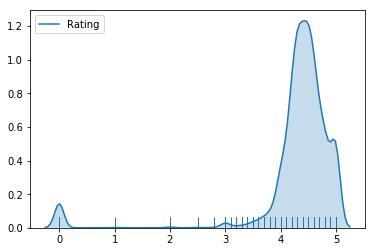

In [28]:
sns.kdeplot(cannabis_data['Rating'], shade=True);
sns.rugplot(cannabis_data['Rating']);
plt.show()


In [29]:
cannabis_type = cannabis_data.groupby('Type').count()
bar_cannabis_type = cannabis_type.drop(columns = ['Rating','Effects',"Flavor",'Description'])
bar_cannabis_type

,Strain
Type,
hybrid,1212
indica,699
sativa,440


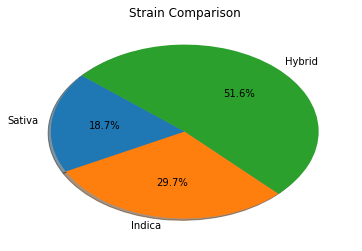

In [30]:
import matplotlib.pyplot as plt
labels = ['Sativa','Indica','Hybrid']
values = [440,699,1212]
plt.title('Strain Comparison')
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

        Strain
Type          
hybrid    1212
indica     699
sativa     440


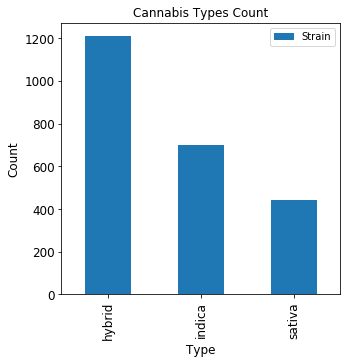

In [31]:
bar_cannabis_type.plot(kind='bar', title ="Cannabis Types Count", figsize=(5, 5), legend=True, fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
print(bar_cannabis_type)

In [32]:
hybrid = []
indica = []
sativa = []

for i in range(0,len(cannabis_data)):
    
    if cannabis_data['Type'].at[i] == 'hybrid':
        hybrid.append(cannabis_data['Type'].at[i])
        
    elif cannabis_data['Type'].at[i] == 'indica':
        indica.append(cannabis_data['Type'].at[i])
            
    else:
        sativa.append(cannabis_data['Type'].at[i])
    


In [33]:
len(hybrid)

1212

In [34]:
len(indica)

699

In [35]:
len(sativa)

440

### Using List Comprehension to obtain the same results

In [36]:
#len([cannabis_data['Type'].at[i] for i in range(0,len(cannabis_data['Type'])) if cannabis_data['Type'].at[i] == 'hybrid'])

In [37]:
#len([cannabis_data['Type'].at[i] for i in range(0,len(cannabis_data['Type'])) if cannabis_data['Type'].at[i] == 'indica'])

In [38]:
#len([cannabis_data['Type'].at[i] for i in range(0,len(cannabis_data['Type'])) if cannabis_data['Type'].at[i] == 'sativa'])

In [39]:
cannabis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [40]:
Rating = []
Type = []
Strain = []

for i in range(0,len(cannabis_data)):
    if cannabis_data['Rating'].at[i] == 5.0:
        Rating.append(cannabis_data['Rating'].at[i])
        Type.append(cannabis_data['Type'].at[i])
        Strain.append(cannabis_data['Strain'].at[i])

In [41]:
rating_ = pd.DataFrame(Rating).rename(columns = {0:'Rating'})
type_ = pd.DataFrame(Type).rename(columns = {0:'Type'})
strain_ = pd.DataFrame(Strain).rename(columns = {0:'Strain'})


In [42]:
# quick check 
print(rating_[0:1])
print(type_[0:1])
print(strain_[0:1])

   Rating
0     5.0
     Type
0  indica
   Strain
0  831-Og


In [43]:
# concat three seperate dataframes
top_rating = pd.concat([rating_,type_,strain_], axis=1, join='inner')
top_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
Rating    210 non-null float64
Type      210 non-null object
Strain    210 non-null object
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


In [44]:
print(len(top_rating.loc[top_rating['Type'] == 'sativa']))
print(len(top_rating.loc[top_rating['Type'] == 'indica']))
print(len(top_rating.loc[top_rating['Type'] == 'hybrid']))

38
70
102


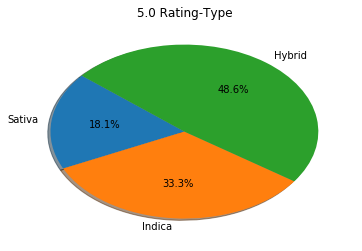

In [45]:
import matplotlib.pyplot as plt
labels = ['Sativa','Indica','Hybrid']
values = [38,70,102]
plt.title('5.0 Rating-Type')
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()


In [46]:
low_Rating = []
low_Type = []
low_Strain = []

for i in range(0,len(cannabis_data)):
    if cannabis_data['Rating'].at[i] == 0.0:
        low_Rating.append(cannabis_data['Rating'].at[i])
        low_Type.append(cannabis_data['Type'].at[i])
        low_Strain.append(cannabis_data['Strain'].at[i])

In [47]:
low_rating_ = pd.DataFrame(low_Rating).rename(columns = {0:'Rating'})
low_type_ = pd.DataFrame(low_Type).rename(columns = {0:'Type'})
low_strain_ = pd.DataFrame(low_Strain).rename(columns = {0:'Strain'})


In [48]:
bottom_rating = pd.concat([low_rating_,low_type_,low_strain_], axis=1, join='inner')
bottom_rating.head()

,Rating,Type,Strain
0,0.0,indica,3-Bears-Og
1,0.0,sativa,Afrikaner
2,0.0,sativa,Bangi-Haze
3,0.0,hybrid,Bermuda-Sour
4,0.0,hybrid,Blizzard-Bush


In [49]:
print(len(bottom_rating.loc[bottom_rating['Type'] == 'sativa']))
print(len(bottom_rating.loc[bottom_rating['Type'] == 'indica']))
print(len(bottom_rating.loc[bottom_rating['Type'] == 'hybrid']))

13
16
42


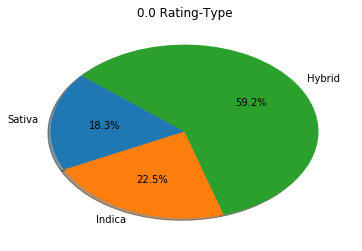

In [50]:
import matplotlib.pyplot as plt
labels = ['Sativa','Indica','Hybrid']
values = [13,16,42]
plt.title('0.0 Rating-Type')
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()


In [51]:
test = cannabis_data.groupby('Rating').count()
test.stack().to_frame().head()

0
Rating                
0.0    Strain       71
       Type         71
       Effects      71
       Flavor       66
       Description  71

In [52]:
# Analyze Strain Variety 
total_strain_ratings = test.drop(columns = ['Type','Effects','Flavor', 'Description'])
total_strain_ratings.sum()

Strain    2351
dtype: int64

In [53]:
top_strain_ratings = total_strain_ratings.tail(6)
top_strain_ratings.sum()

Strain    1151
dtype: int64

In [54]:
int(total_strain_ratings.sum()-top_strain_ratings.sum())

1200

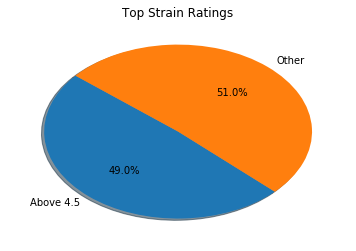

     49% of the Strains are rated above 4.5


In [55]:
import matplotlib.pyplot as plt
labels = ['Above 4.5', 'Other']
values = [int(top_strain_ratings.sum()),int(total_strain_ratings.sum()-top_strain_ratings.sum())]
plt.title('Top Strain Ratings')
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()
print('     49% of the Strains are rated above 4.5')

In [56]:
top_strain_ratings['Strain']

Rating
4.5    317
4.6    242
4.7    164
4.8    159
4.9     59
5.0    210
Name: Strain, dtype: int64

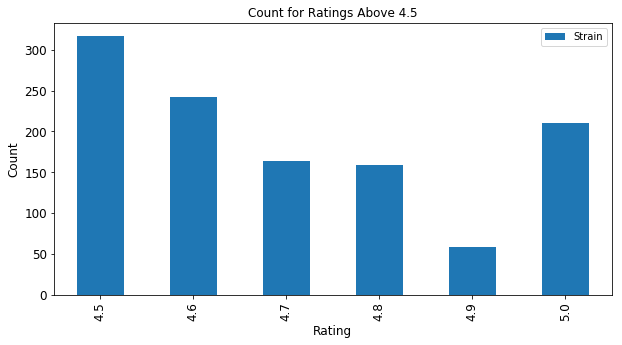

In [57]:
top_strain_ratings.plot(kind='bar', title ="Count for Ratings Above 4.5", figsize=(10, 5), fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [58]:
len(total_strain_ratings)

26

In [59]:
stack_df = test.stack().to_frame().rename(columns = {0:'Data Type'})
pd.set_option('display.max_rows', 130)
#stack_df.tail(30)

In [60]:
len(stack_df)

130

In [61]:
sorted_cannabis_data = cannabis_data.sort_values(by = ['Rating'],ascending = False)
sorted_cannabis_data

,Strain,Type,Rating,Effects,Flavor,Description
671,Dizzy-Og,hybrid,5.0,"Giggly,Relaxed,Uplifted,Happy,Hungry","Sweet,Pungent,Spicy/Herbal",Dizzy OG took 2nd place for Best Medical Hybri...
2120,Tardis,sativa,5.0,"Talkative,Creative,Euphoric,Focused,Aroused","Sweet,Diesel,Spicy/Herbal","Tardis, or “The Tardis,” is a sativa-dominant ..."
2117,Tangier-Chilly,hybrid,5.0,"Talkative,Uplifted,Creative,Energetic,Giggly","Citrus,Orange,Pine",Tangier Chilly by Mr. Mack’s Snacks is an homa...
497,Cherwillie,hybrid,5.0,"Creative,Energetic,Happy,Relaxed,Focused","Sweet,Strawberry,Citrus",CherWillie is the sativa-dominant hybrid cross...
2112,Tangerine-Trainwreck-Haze,sativa,5.0,"Euphoric,Aroused,Uplifted,Creative,Energetic","Sweet,Citrus,Orange",Tangerine Trainwreck Haze is another beautiful...
1345,Mangolicious,indica,5.0,"Uplifted,Focused,Relaxed,Giggly,Happy","Sweet,Tropical,Pineapple",Mangolicious is an indica-dominant cross of Bi...
193,Berts-Cookie-Dough,hybrid,5.0,"Uplifted,Energetic,Happy,Hungry",None,Bert’s Cookie Dough by Los Angeles Kush is a h...
194,Bertberry-Cheesecake,sativa,5.0,"Uplifted,Creative,Euphoric,Focused,Energetic","Cheese,Berry,Tree,Fruit",Bertberry Cheesecake by Bert Baccarat is a bri...
2104,Tangenesia,hybrid,5.0,None,None,Tangenesia is a heady bud crafted from even he...
1721,Purple-Swish,indica,5.0,"Happy,Energetic,Sleepy,Giggly,Hungry","Berry,Sweet,Grape",Purple Swish is an intensely fruity indica str...
